https://www.kaggle.com/yasufuminakama/ranzcr-resnext50-32x4d-starter-training

### Data Loading

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# os.listdir('data/ranzcr-clip-catheter-line-classification')

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/sample_submission.csv')
display(train.head())
display(test.head())

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,1.2.826.0.1.3680043.8.498.46923145579096002617...,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.84006870182611080091...,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.12219033294413119947...,0,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.84994474380235968109...,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.35798987793805669662...,0,0,0,0,0,0,0,0,0,0,0


### Quick EDA

In [4]:
train['PatientID'].value_counts()

05029c63a    172
55073fece    167
26da0d5ad    148
8849382d0    130
34242119f    110
            ... 
b6c109345      1
5ab98e353      1
1ea898eeb      1
0b9105f28      1
89e4d0d67      1
Name: PatientID, Length: 3255, dtype: int64

In [5]:
test.columns

Index(['StudyInstanceUID', 'ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present'],
      dtype='object')

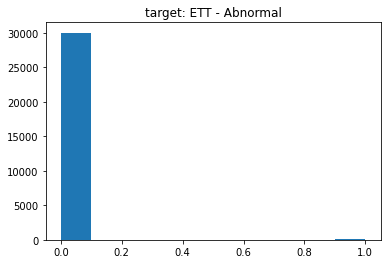

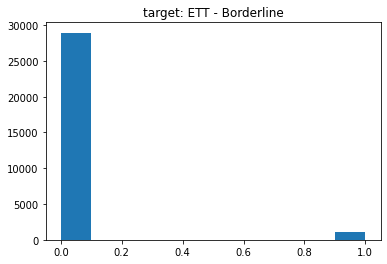

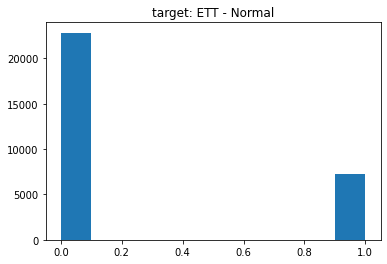

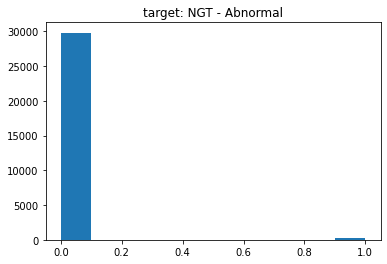

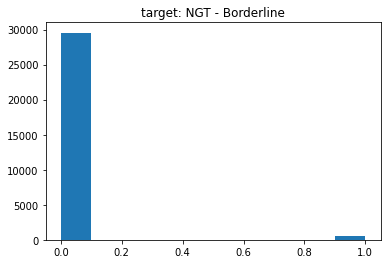

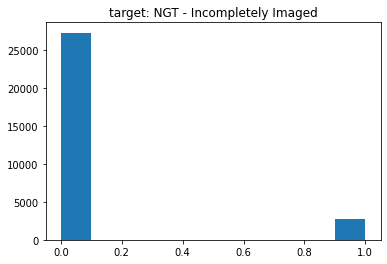

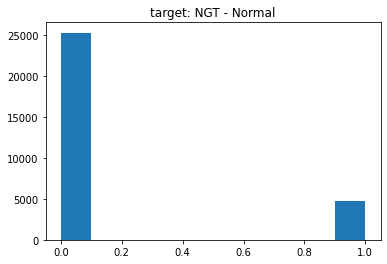

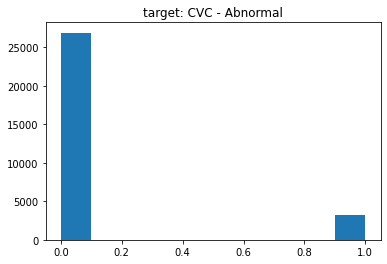

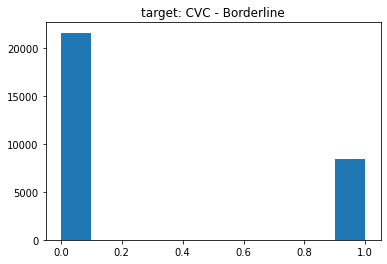

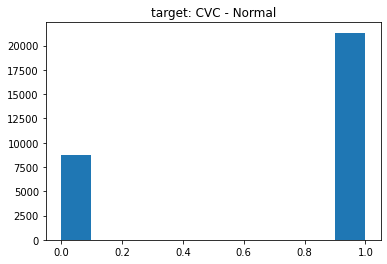

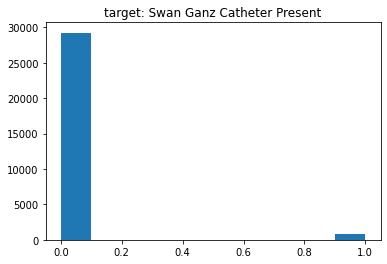

In [6]:
target_cols = ['ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']
for c in target_cols:
    plt.hist(train[c].values)
    plt.title(f'target: {c}')
    plt.show()

### Directory settings

In [7]:
import os

output_dir = './output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
train_path = 'data/train_640'

### DATA Resizing

In [8]:
# !pip3 install opencv-python
# !pip3 install tqdm

In [9]:
# import os
# import cv2
# import zipfile
# import numpy as np
# import pandas as pd
# from tqdm.auto import tqdm
# import matplotlib.pyplot as plt

# train = pd.read_csv('data/train.csv')
# train_path = ('data/train/')
# with zipfile.ZipFile(f'data/train.zip', 'w') as img_out:
#     for uid in tqdm(train['StudyInstanceUID'].values):
#         image = cv2.imread(train_path + f'{uid}.jpg')
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (640, 640))
#         image = cv2.imencode('.png', image)[1]
#         img_out.writestr(f'{uid}.png', image)

#### os.listdir

In [10]:
os.listdir('data/')

['.DS_Store',
 'train_640',
 'test',
 'ranzcr-clip-catheter-line-classification.zip',
 'train_640.zip',
 'test_tfrecords',
 'train_tfrecords',
 'train',
 'train.csv',
 'shutil',
 'train_annotations.csv',
 'sample_submission.csv']

In [11]:
len(os.listdir('data/train_640/'))

30083

zipfile
- https://docs.python.org/3/library/zipfile.html#zipfile-objects
- The class for reading and writing ZIP files.

tqdm
- http://www.gisdeveloper.co.kr/?p=8636
- https://tariat.tistory.com/421
- https://m.blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221275017358&proxyReferer=https:%2F%2Fwww.google.com%2F
- for문의 진행률을 표현해주는 library.

### CFG

In [12]:
# params를 CFG class에 저장
class CFG:
    debug=False
    print_freq=100
    num_workers=4
    model_name='resnext50_32x4d'
    size=600
    scheduler='CosineAnnealingLR'
    # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=6
    T_max=6
    lr=1e-4
    min_lr=1e-6
    batch_size=32
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    target_size=11
    target_cols=['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 
                 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
                 'Swan Ganz Catheter Present']
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    train=True
    
if CFG.debug:
    CFG.epochs = 1
    train = train.sample(
        n=100, random_state=CFG.seed
    ).reset_index(drop=True)

#### Pandas df.sample

In [13]:
# *** sample method of Pandas DataFrame ***
# train = pd.read_csv('data/train.csv')
train.sample(n=2)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
20240,1.2.826.0.1.3680043.8.498.44372659431471973188...,0,0,0,0,0,0,0,0,0,1,0,85986429e
25639,1.2.826.0.1.3680043.8.498.88533783712029137661...,0,0,0,0,0,0,0,1,0,0,0,ead93484d


### Library

In [14]:
import sys
sys.path.append('data/pytorch-image-models/pytorch-image-models-master')

import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

from albumentations import (
    Compose, OneOf, Normalize, Resize, RandomResizedCrop, RandomCrop, HorizontalFlip, VerticalFlip, 
    RandomBrightness, RandomContrast, RandomBrightnessContrast, Rotate, ShiftScaleRotate, Cutout, 
    IAAAdditiveGaussianNoise, Transpose
    )
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm

from torch.cuda.amp import autocast, GradScaler

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### shutil (셸 유틸리티)
- https://ponyozzang.tistory.com/439

In [15]:
import shutil

In [16]:
# # 파일 복사하기
# # copyfile, copy는 메타정보는 복사되지 않음
# # copy2는 메타정보(파일을 작성한 날짜 등)도 복사
# shutil.copyfile(
#     'data/shutil/shutil_test.txt',
#     'data/shutil/shutil_test2.txt'
# )

In [17]:
# # 폴더 복사하기
# shutil.copytree(
#     'data/shutil',
#     'data/shutil2'
# )

#### pathlib
- https://brownbears.tistory.com/415
- 파이썬 3.4부터 내장함수로 추가(이전에는 os 모듈의 `os.path` 사용)
- 파일 경로를 단순 문자열이 아니라 객체로 다루고자 하는 것
    - -> 연산자로 정의할 수 있게 됨

In [18]:
# 파일 존재여부 확인
import os
from pathlib import Path

file_path = 'data/shutil'

if os.path.exists(file_path):
    pass

p = Path(file_path)

if p.exists():
    pass

In [19]:
# 연산자로 path 정의
import os
from pathlib import Path

dir_name = 'data'
sub_dir_name = 'shutil'
file_name = 'shutil_test.txt'

# 기존(os.path)
file_os = os.path.join(dir_name, sub_dir_name, file_name)

# pathlib
dir_name = Path(dir_name)
file_pathlib = dir_name / sub_dir_name / file_name

print('file_os: ', file_os)
print('file_pathlib: ', file_pathlib)

file_os:  data/shutil/shutil_test.txt
file_pathlib:  data/shutil/shutil_test.txt


#### contextlib contextmanager
- https://sjquant.tistory.com/12

#### albumentations
- https://hoya012.github.io/blog/albumentation_tutorial/
- image 형태 변환시 사용
- torchvision.transforms보다 기능도 다양하고 빠름

#### KFold
- GroupKFold
    - https://woolulu.tistory.com/71
    - 얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명에 대해 한사람당 여러장의 사진을 모았을 때
    - 한사람의 사진은 train이든 test든 둘 중 하나에만 들어가야 함
    - GroupKFold는 groups를 매개변수로 전달받으며, 이를 기반으로 train과 test를 나눌 때 한 그룹이 서로 분리되지 않도록 한다
- StratifiedKFold
    - https://sgmath.tistory.com/61
    - label의 분포를 유지시켜줌
    - 즉, 각 fold 안의 데이터셋의 label 분포가 전체 데이터셋의 label 분포를 따름 (각 fold가 전체 데이터셋을 잘 대표한다)

### Utils

In [20]:
def get_score(y_true, y_pred):
    scores = []
    for i in range(y_true.shape[1]):
        score = roc_auc_score(y_true[:,i], y_pred[:,i])
        scores.append(score)
    avg_score = np.mean(scores)
    return avg_score, scores

@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f'[{name}] start')
    yield
    LOGGER.info(f'[{name}] done in {time.time() - t0:.0f} s.')
    
def init_logger(log_file=output_dir+'train.log'):
    from logging import getLogger, INFO, FileHandler, Formatter, StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()

def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_torch(seed=CFG.seed)

### CV split

In [21]:
train.tail()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8
30082,1.2.826.0.1.3680043.8.498.99518162226171269731...,0,0,1,0,0,0,0,0,0,1,0,e692d316c


In [22]:
folds = train.copy()
Fold = GroupKFold(n_splits=CFG.n_fold)
groups = folds['PatientID'].values

# CFG.n_fold=4 iteration -> for loop
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds[CFG.target_cols], groups)):
    # labeling the group info
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
display(folds.groupby('fold').size())

fold
0    7521
1    7521
2    7521
3    7520
dtype: int64

### Dataset

In [23]:
class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['StudyInstanceUID'].values
        self.labels = df[CFG.target_cols].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = f'{train_path}/{file_name}.png'
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = torch.tensor(self.labels[idx]).float()
        return image, label

### Transforms

In [24]:
def get_transforms(*, data):
    if data == 'train':
        return Compose([
            # Resize(CFG.size, CFG.size)
            RandomResizedCrop(CFG.size, CFG.size, scale=(0.85, 1.0)),
            HorizontalFlip(p=0.5),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])
    elif data == 'valid':
        return Compose([
            Resize(CFG.size, CFG.size),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])

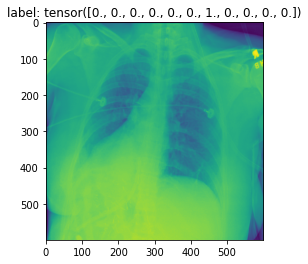

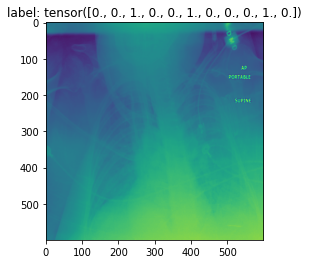

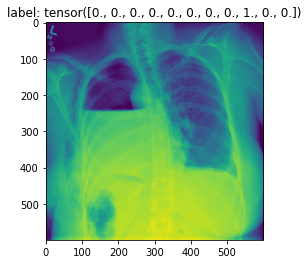

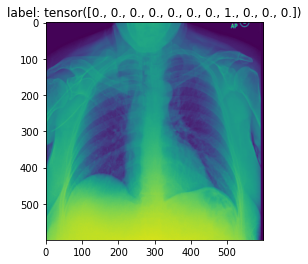

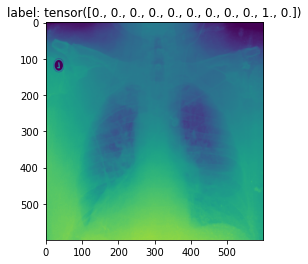

In [25]:
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))

for i in range(5):
    image, label = train_dataset[i]
    plt.imshow(image[0])
    plt.title(f'label: {label}')
    plt.show()

### MODEL

In [26]:
class CustomResNext(nn.Module):
    def __init__(self, model_name='resnext50_32x4d', pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        n_features = self.model.fc.in_features
        self.model.fc = nn.Linear(n_features, CFG.target_size)

    def forward(self, x):
        y_pred = self.model(x)
        return y_pred

https://blog.naver.com/PostView.nhn?blogId=ckdgus1433&logNo=221407059199

> 놀랍게도 우리는 ImageNet Classfication 대회에서 우승했던 모델과 그 가중치를 가져와 쓸 수 있는데, 이것이 바로 앞서 언급 했던 Pre-Trained Model이다. 도대체 어떻게하면 이렇게 'Deep한' 모델을 가져다 쓸 수 있을까.
```python
model_ft = models.resnet18(pretrained=True)
```
> 오늘의 핵심을 단 한 줄로 설명하면 바로 이 코드가 되겠다. torchvision 라이브러리에서는 ResNet 시리즈와 VGG 시리즈 등 ImageNet의 모든 대표작들을 잘 구현해 놓았다. 따라서 우리는 라이브러리에서 꺼내 쓰기만 하면 되는 것이다. 또한 Pre-Trained Weights의 경우, 모델을 불러올 때 파라미터로 pretrained=True 값만 입력해주면 자동으로 Weights 값을 불러올 수 있다.

### Helper functions

In [28]:
class AverageMeter(object):
    """
    Computes and stores the average and current value
    """
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))

def train_fn(
    train_loader,
    model,
    criterion,
    optimizer,
    epoch,
    scheduler,
    device
):
    scaler = GradScaler()
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    print('before model.train() called')
    model.train()
    print('model.train() called')
    start = end = time.time()
    print('start :', start)
    global_step = 0
    print('global_step :', global_step)
    print('length of train_loader', len(train_loader))
    for step, (images, labels) in enumerate(train_loader):
        print(step, len(train_loader))
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        with autocast():
            print(step, 'train started')
            y_preds = model(images)
            print('y_preds shape', y_preds.size())
            print('labels shape', labels.size())
            
            loss = criterion(y_preds, labels)
            print(step, 'train ended')
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        scaler.scale(loss).backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
              'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
              'Elapsed {remain:s} '
              'Loss: {loss.val:.4f}({loss.avg:.4f}) '
              'Grad: {grad_norm:.4f}  '
              #'LR: {lr:.6f}  '
              .format(
               epoch+1, step, len(train_loader), batch_time=batch_time,
               data_time=data_time, loss=losses,
               remain=timeSince(start, float(step+1)/len(train_loader)),
               grad_norm=grad_norm,
               #lr=scheduler.get_lr()[0],
               ))
    return losses.avg

def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valide_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size()
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = criterion(y_preds, labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
              'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
              'Elapsed {remain:s} '
              'Loss: {loss.val:.4f}({loss.avg:.4f}) '
              .format(
               step, len(valid_loader), batch_time=batch_time,
               data_time=data_time, loss=losses,
               remain=timeSince(start, float(step+1)/len(valid_loader)),
               ))
    predictions = np.concatenate(preds)
    return losses.avg, predictions

**Grad Scaler**
- If the forward pass for a particular op has float16 inputs, the backward pass for that op will produce float16 gradients. Gradient values with small magnitudes may not be representable in float16. These values will flush to zero (“underflow”), so the update for the corresponding parameters will be lost.
- To prevent underflow, “gradient scaling” multiplies the network’s loss(es) by a scale factor and invokes a backward pass on the scaled loss(es). Gradients flowing backward through the network are then scaled by the same factor. In other words, gradient values have a larger magnitude, so they don’t flush to zero.
- loss에 scale factor를 곱하여 크게 조정함으로써 gradient가 점점 작아져 0에 가까워지는 것을 방지한다

### Train loop

In [29]:
CFG.num_workers = 0

In [30]:
def train_loop(folds, fold):
    
    LOGGER.info(f"========== fold: {fold} training ==========")
    
    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index
    
    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values
    
    train_dataset = TrainDataset(train_folds, 
                                 transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, 
                                 transform=get_transforms(data='valid'))

    train_loader = DataLoader(train_dataset, 
                              batch_size=CFG.batch_size, 
                              shuffle=True, 
                              num_workers=CFG.num_workers,
#                               pin_memory=True,
                              drop_last=True,
                             )
    valid_loader = DataLoader(valid_dataset, 
                              batch_size=CFG.batch_size * 2, 
                              shuffle=False, 
                              num_workers=CFG.num_workers,
#                               pin_memory=True,
                              drop_last=False,
                             )
    
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    print('before model initialized')
    model = CustomResNext(CFG.model_name, pretrained=True)
    model.to(device)
    print('model initialized')

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf
    
    for epoch in range(CFG.epochs):
        print('epoch :', epoch)
        start_time = time.time()
        
        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score, scores = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}  Scores: {np.round(scores, decimals=4)}')

        """
        if score > best_score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best.pth')
        """
        
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        output_dir+f'{CFG.model_name}_fold{fold}_best.pth')
    
    check_point = torch.load(output_dir+f'{CFG.model_name}_fold{fold}_best.pth')
    for c in [f'pred_{c}' for c in CFG.target_cols]:
        valid_folds[c] = np.nan
    valid_folds[[f'pred_{c}' for c in CFG.target_cols]] = check_point['preds']

    return valid_folds

In [31]:
def main():

    """
    Prepare: 1.train  2.folds
    """

    def get_result(result_df):
        preds = result_df[[f'pred_{c}' for c in CFG.target_cols]].values
        labels = result_df[CFG.target_cols].values
        score, scores = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}  Scores: {np.round(scores, decimals=4)}')
    
    if CFG.train:
        # train 
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(folds, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        # save result
        oof_df.to_csv(output_dir+'oof_df.csv', index=False)

In [32]:
if __name__ == '__main__':
    print('a')
    main()

========== fold: 0 training ==========


a
before model initialized
model initialized
epoch : 0
before model.train() called
model.train() called
start : 1613048668.655149
global_step : 0
length of train_loader 705
0 705
0 train started
y_preds shape torch.Size([32, 11])
labels shape torch.Size([32, 11])
0 train ended
Epoch: [1][0/705] Data 0.891 (0.891) Elapsed 5m 31s (remain 3886m 27s) Loss: 0.7092(0.7092) Grad: 1.6486  
1 705
1 train started
y_preds shape torch.Size([32, 11])
labels shape torch.Size([32, 11])
1 train ended


KeyboardInterrupt: 